In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
df= pd.read_excel("/content/drive/MyDrive/dataset/phd-data_version-2.xlsx")
df.head()

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years),Class
0,3.5,111,328,0,2,3.4,C
1,3.5,111,328,0,2,3.4,C
2,3.5,111,328,0,2,3.4,C
3,3.5,111,328,0,2,3.4,C
4,3.5,111,328,0,2,3.4,C


In [ ]:
df.describe()

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years)
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,3.539877,102.552050,289.738170,1.725552,0.583596,1.938013
std,0.265439,8.813897,87.300175,2.456664,1.106704,2.792573
min,2.960000,81.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,96.000000,307.000000,0.000000,0.000000,0.300000
50%,3.580000,103.000000,315.000000,1.000000,0.000000,1.200000
75%,3.780000,109.000000,322.000000,2.000000,1.000000,3.000000
max,3.950000,120.000000,336.000000,12.000000,6.000000,25.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Undergrade CGPA        317 non-null    float64
 1   TOEFL                  317 non-null    int64  
 2   GRE/GMAT               317 non-null    int64  
 3   Conference Paper       317 non-null    int64  
 4   Journal Paper          317 non-null    int64  
 5   Job Experience(Years)  317 non-null    float64
 6   Class                  317 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 17.5+ KB


In [ ]:
df.isnull().sum()

Undergrade CGPA          0
TOEFL                    0
GRE/GMAT                 0
Conference Paper         0
Journal Paper            0
Job Experience(Years)    0
Class                    0
dtype: int64

Text(0, 0.5, 'Number')

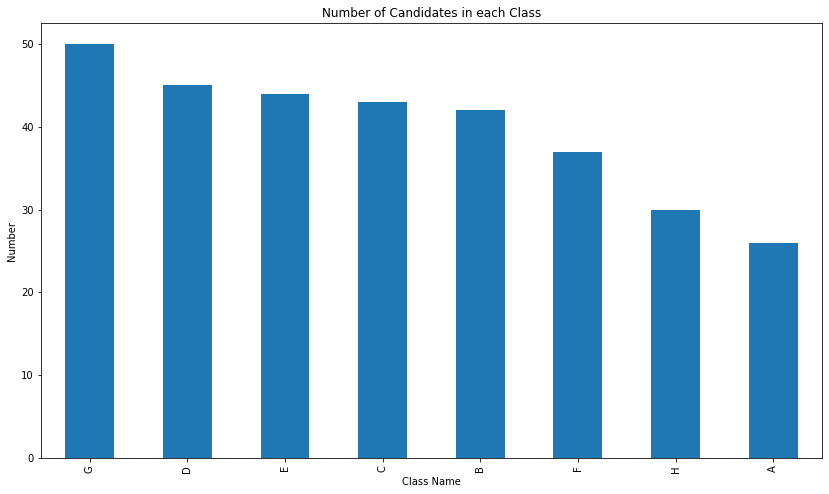

In [ ]:
ax = df['Class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Candidates in each Class")
ax.set_xlabel("Class Name")
ax.set_ylabel("Number")

In [ ]:
df['Class'].value_counts()

G    50
D    45
E    44
C    43
B    42
F    37
H    30
A    26
Name: Class, dtype: int64

Relplotting

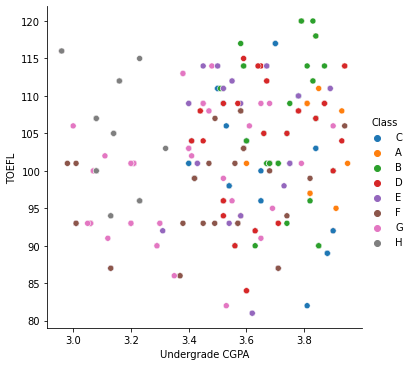

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="TOEFL", hue="Class")

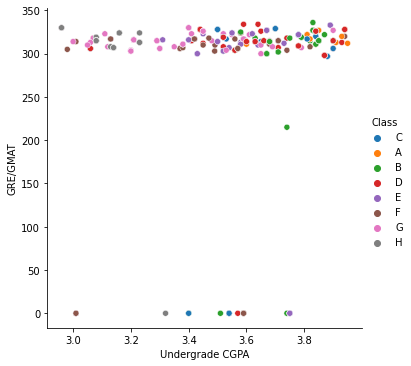

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="GRE/GMAT", hue="Class")

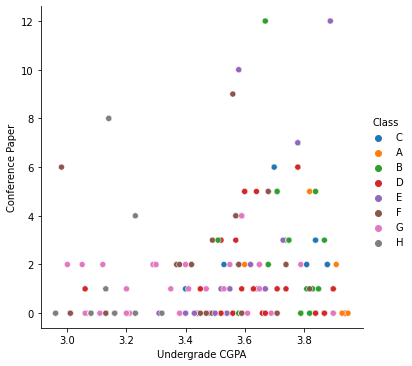

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Conference Paper", hue="Class")

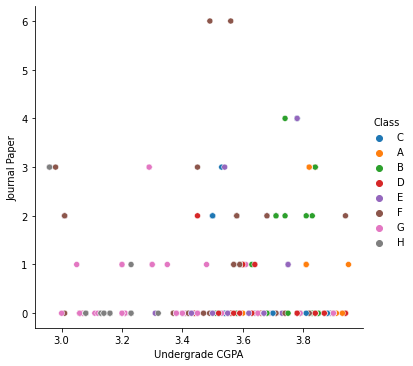

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Journal Paper", hue="Class")

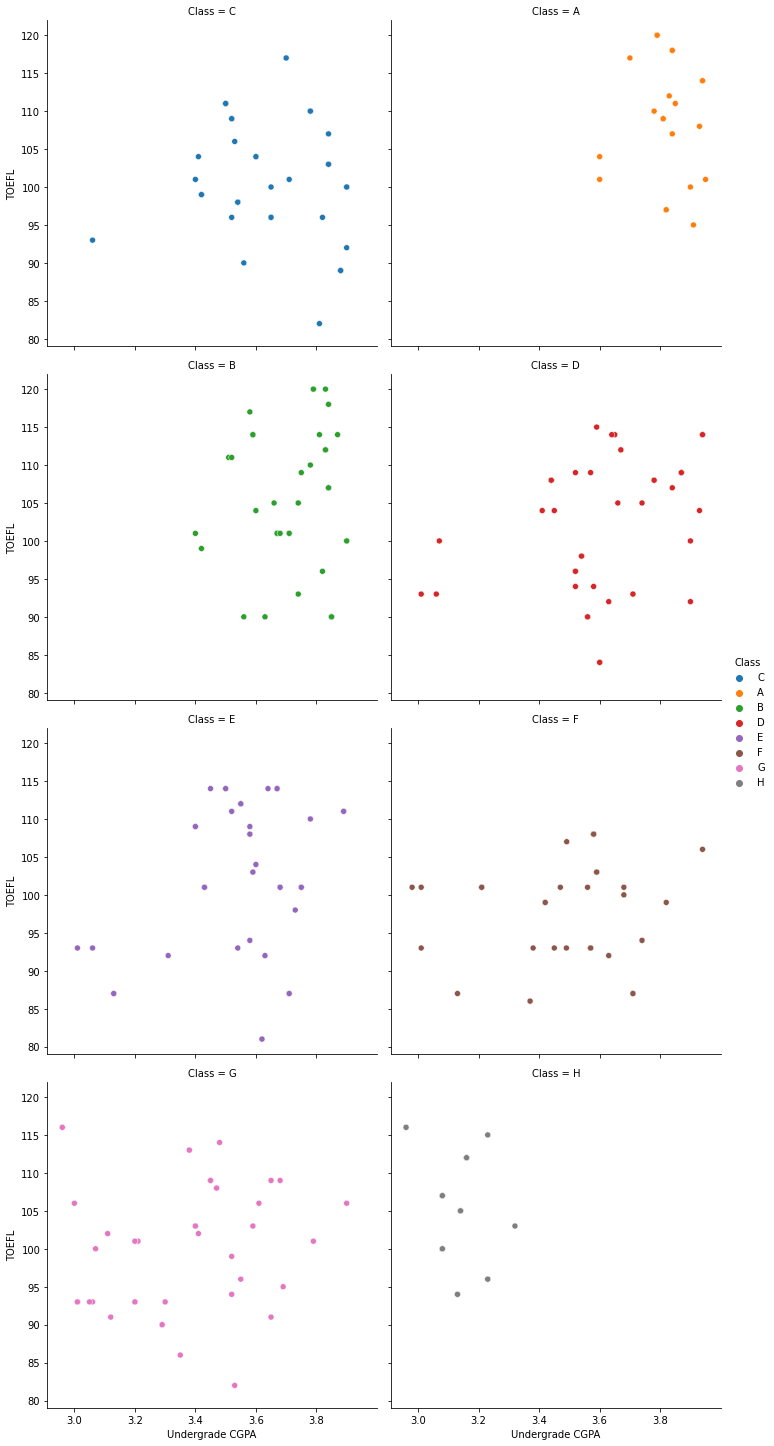

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="TOEFL", hue="Class", col="Class", col_wrap=2)

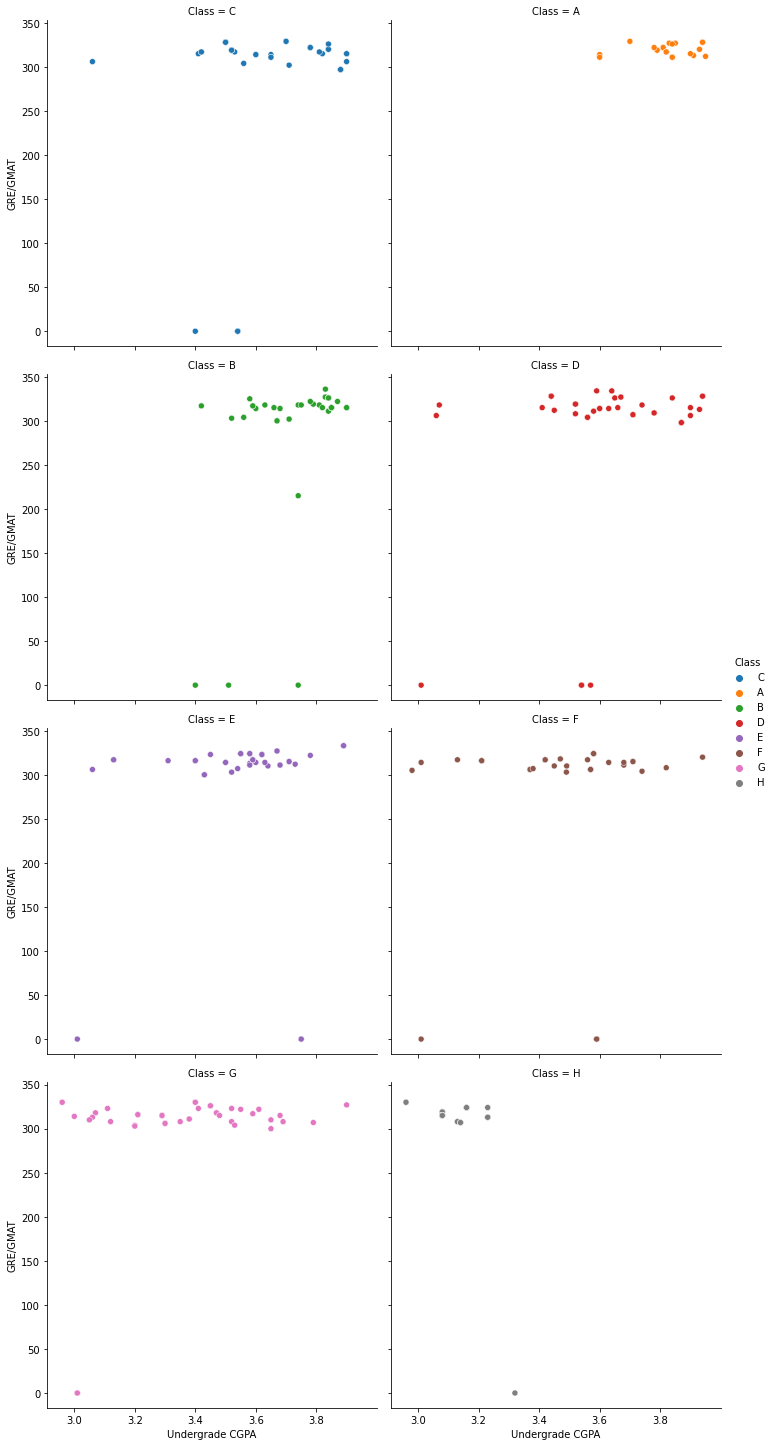

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="GRE/GMAT", hue="Class", col="Class", col_wrap=2)

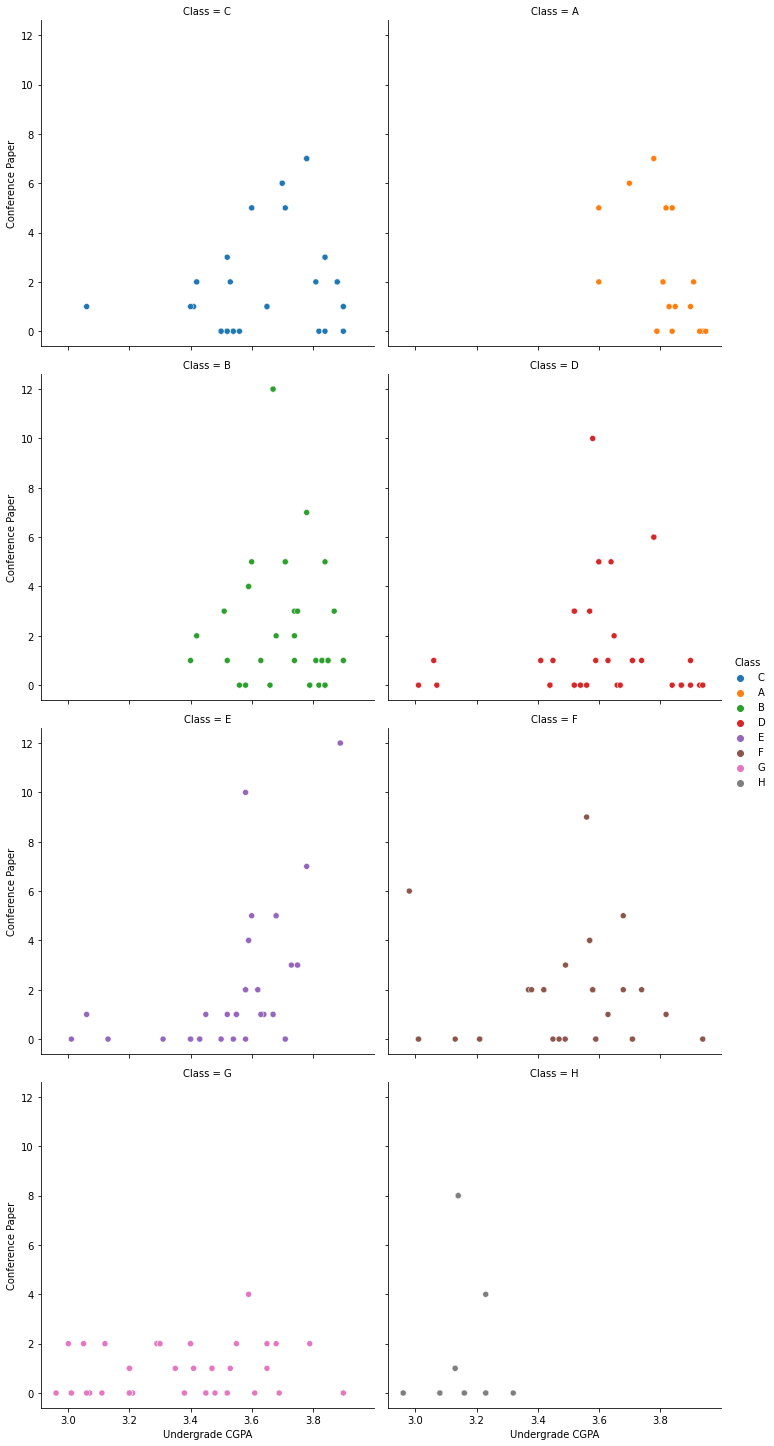

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Conference Paper", hue="Class", col="Class", col_wrap=2)

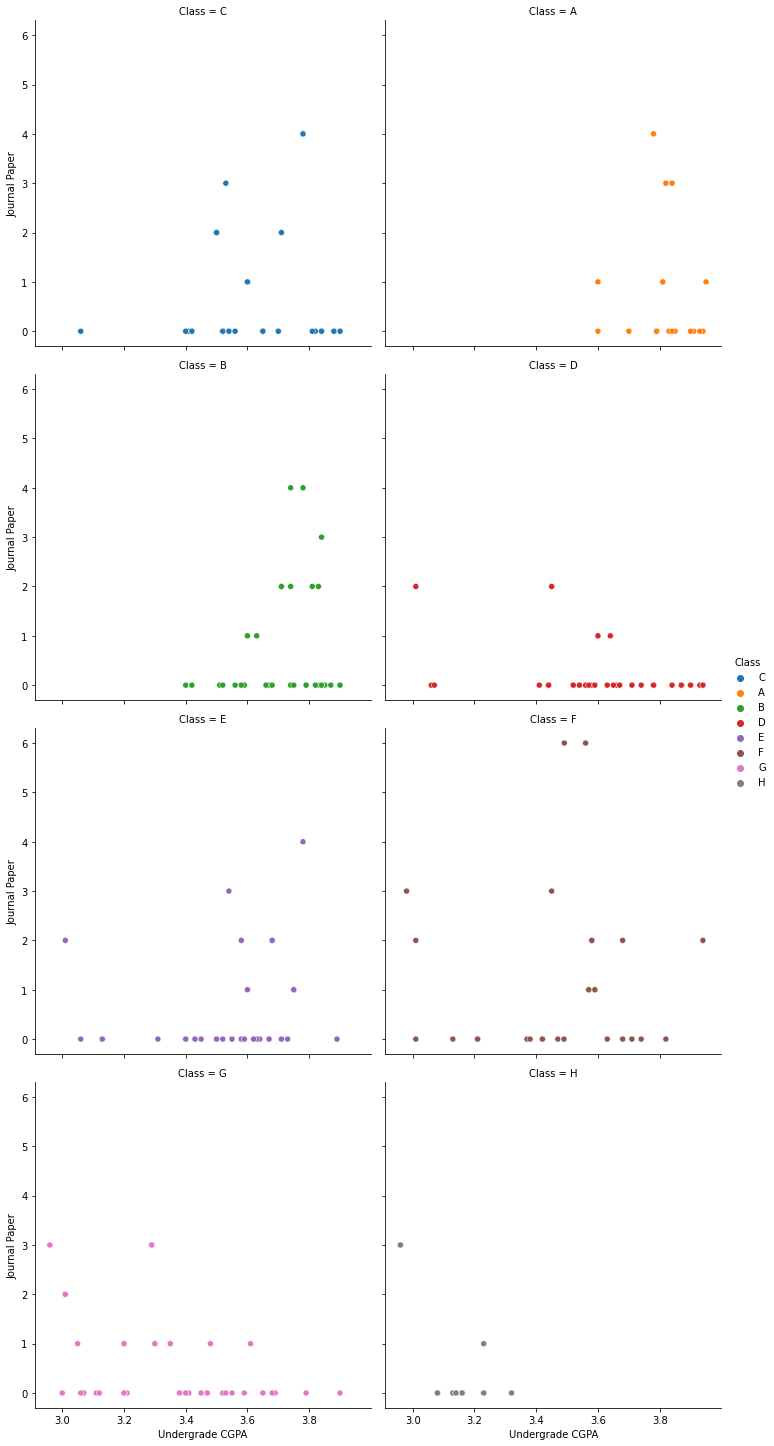

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Journal Paper", hue="Class", col="Class", col_wrap=2)

In [ ]:
df.head()

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years),Class
0,3.5,111,328,0,2,3.4,C
1,3.5,111,328,0,2,3.4,C
2,3.5,111,328,0,2,3.4,C
3,3.5,111,328,0,2,3.4,C
4,3.5,111,328,0,2,3.4,C


Regression Plot

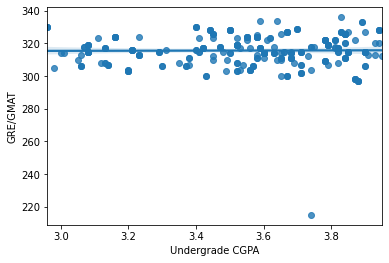

In [ ]:
df_gre = df[df["GRE/GMAT"]>1 ]
sns.regplot(data=df_gre, x="Undergrade CGPA", y="GRE/GMAT")

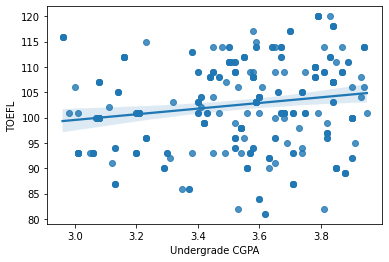

In [ ]:
df_gre = df[df["TOEFL"]>1 ]
sns.regplot(data=df_gre, x="Undergrade CGPA", y="TOEFL")

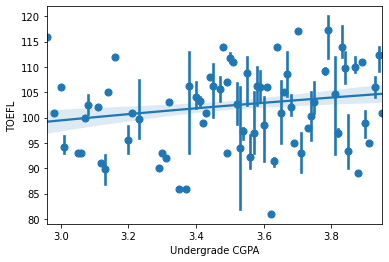

In [ ]:
ax = sns.regplot(x="Undergrade CGPA", y="TOEFL", data=df,
                 x_estimator=np.mean, logx=True)

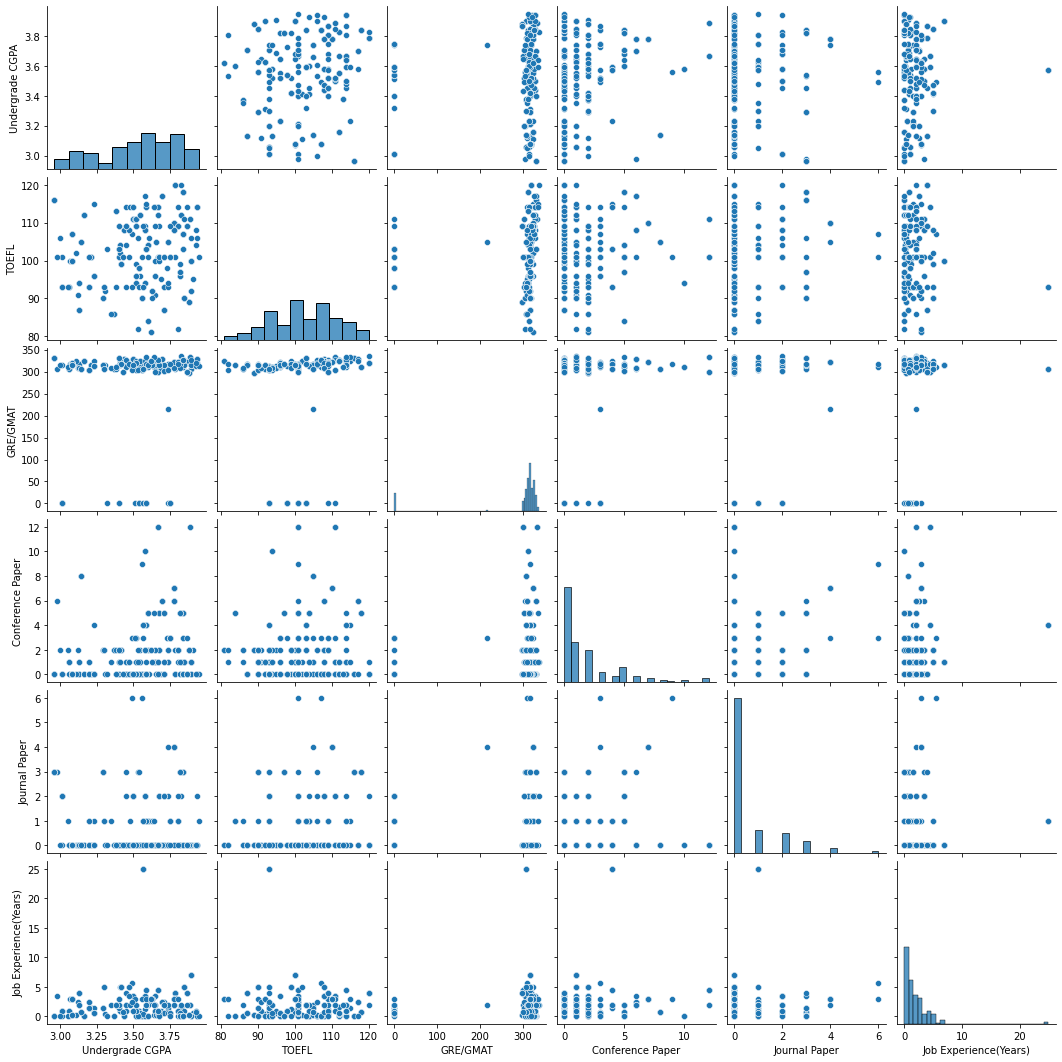

In [ ]:
sns.pairplot(df)

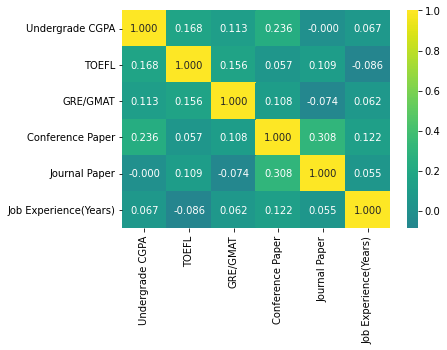

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Undergrade CGPA',
             'TOEFL','GRE/GMAT',
             'Conference Paper','Journal Paper']

features_tf = pd.DataFrame(data=df)
features_tf[numerical] = scaler.fit_transform(features_tf[numerical])
features_tf.head(20)

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years),Class
0,0.545455,0.769231,0.976190,0.000000,0.333333,3.4,C
1,0.545455,0.769231,0.976190,0.000000,0.333333,3.4,C
2,0.545455,0.769231,0.976190,0.000000,0.333333,3.4,C
3,0.545455,0.769231,0.976190,0.000000,0.333333,3.4,C
4,0.545455,0.769231,0.976190,0.000000,0.333333,3.4,C
5,0.878788,0.794872,0.973214,0.083333,0.000000,1.6,A
6,0.878788,0.794872,0.973214,0.083333,0.000000,1.6,B
7,0.878788,0.794872,0.973214,0.083333,0.000000,1.6,B
8,0.454545,0.589744,0.937500,0.083333,0.000000,0.9,C
9,0.454545,0.589744,0.937500,0.083333,0.000000,0.9,D


In [ ]:
data = features_tf.iloc[:,1:].values
labels = features_tf['Class']
features_tf = features_tf.drop(columns=['Class'])

In [ ]:
labels.head()

0    C
1    C
2    C
3    C
4    C
Name: Class, dtype: object

In [ ]:
data1 = pd.get_dummies(data = features_tf)
data1.head()

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years)
0,0.545455,0.769231,0.97619,0.0,0.333333,3.4
1,0.545455,0.769231,0.97619,0.0,0.333333,3.4
2,0.545455,0.769231,0.97619,0.0,0.333333,3.4
3,0.545455,0.769231,0.97619,0.0,0.333333,3.4
4,0.545455,0.769231,0.97619,0.0,0.333333,3.4


In [ ]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state = 123)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_over, y_over = oversampling.fit_resample(data1,labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_over = pd.DataFrame(X_over, columns=data1.columns)
y_over = pd.DataFrame(y_over)
y_over.value_counts()

H    50
G    50
F    50
E    50
D    50
C    50
B    50
A    50
dtype: int64

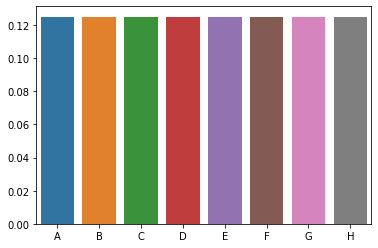

In [ ]:
sns.barplot(x=["A","B","C","D","E","F","G","H"], y=y_over.value_counts(normalize=True))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_over,y_over, shuffle=True, train_size = 0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(300, 6) (100, 6) (300, 1) (100, 1)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = model.predict(x_train)

In [ ]:
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)

F1-score% = 88.97159358959568 | Accuracy% = 89.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           A       0.91      0.89      0.90        35
           B       0.78      0.82      0.80        34
           C       0.82      0.85      0.84        39
           D       0.81      0.90      0.85        39
           E       0.94      0.85      0.89        40
           F       0.91      0.91      0.91        35
           G       0.95      0.90      0.92        39
           H       1.00      1.00      1.00        39

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



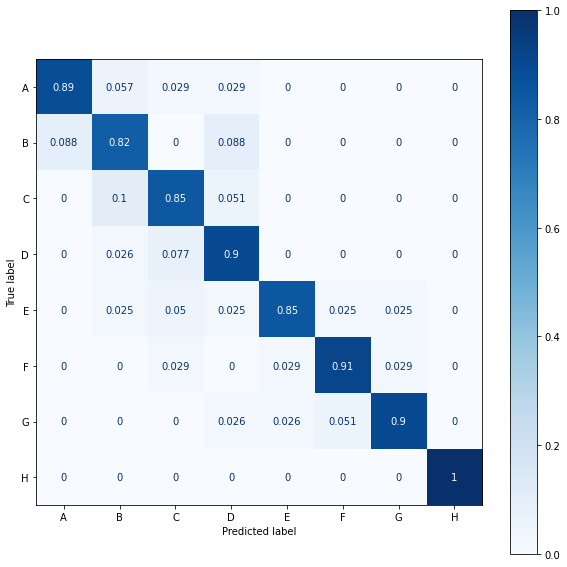

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_train, preds, labels=df['Class'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_train, y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(y_train,preds)
print(cf_matrix)

[[31  2  1  1  0  0  0  0]
 [ 3 28  0  3  0  0  0  0]
 [ 0  4 33  2  0  0  0  0]
 [ 0  1  3 35  0  0  0  0]
 [ 0  1  2  1 34  1  1  0]
 [ 0  0  1  0  1 32  1  0]
 [ 0  0  0  1  1  2 35  0]
 [ 0  0  0  0  0  0  0 39]]


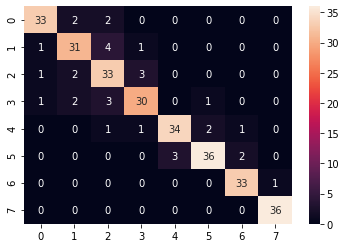

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

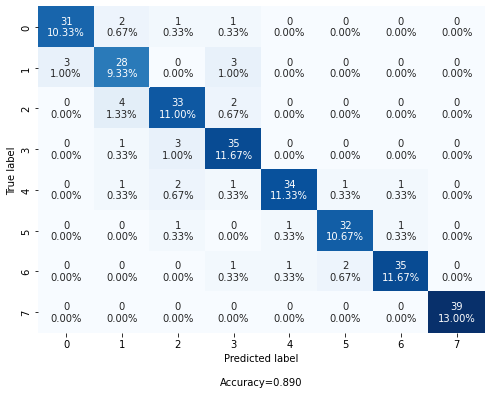

In [ ]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# LGBM Model

In [ ]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier()
lgbmc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds =lgbmc.predict(x_train)


In [ ]:
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)

F1-score% = 88.84907712685231 | Accuracy% = 88.66666666666667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           A       0.94      0.86      0.90        37
           B       0.90      0.76      0.82        37
           C       0.71      0.95      0.81        39
           D       0.86      0.84      0.85        37
           E       0.97      0.82      0.89        39
           F       0.90      0.90      0.90        41
           G       0.92      0.97      0.94        34
           H       0.97      1.00      0.99        36

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



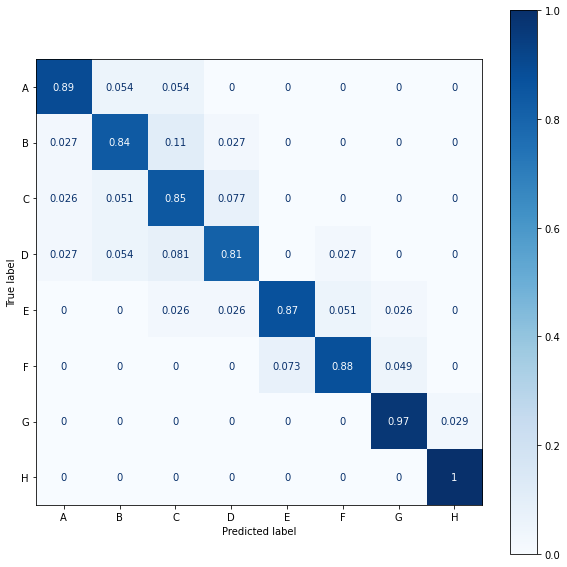

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_train, preds, labels=df['Class'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_train, y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(y_train,preds)
print(cf_matrix)

[[32  2  3  0  0  0  0  0]
 [ 1 28  6  2  0  0  0  0]
 [ 0  1 37  1  0  0  0  0]
 [ 1  0  5 31  0  0  0  0]
 [ 0  0  1  1 32  4  1  0]
 [ 0  0  0  1  1 37  2  0]
 [ 0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  0  0 36]]


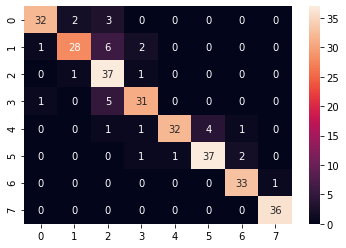

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
preds =ET.predict(x_train)
print(preds)

['F' 'D' 'C' 'H' 'D' 'G' 'D' 'B' 'B' 'G' 'H' 'E' 'F' 'F' 'D' 'F' 'F' 'D'
 'H' 'B' 'E' 'D' 'F' 'C' 'A' 'C' 'B' 'B' 'A' 'C' 'F' 'A' 'D' 'C' 'H' 'C'
 'E' 'E' 'A' 'A' 'C' 'F' 'H' 'F' 'E' 'E' 'F' 'D' 'B' 'B' 'G' 'C' 'C' 'E'
 'B' 'E' 'A' 'D' 'C' 'D' 'H' 'D' 'H' 'F' 'E' 'C' 'H' 'H' 'F' 'C' 'B' 'C'
 'E' 'D' 'A' 'H' 'E' 'A' 'E' 'G' 'C' 'H' 'F' 'D' 'D' 'B' 'C' 'C' 'G' 'H'
 'E' 'A' 'F' 'D' 'F' 'H' 'A' 'B' 'D' 'A' 'G' 'B' 'C' 'E' 'E' 'A' 'A' 'A'
 'D' 'E' 'F' 'E' 'H' 'D' 'B' 'B' 'F' 'H' 'G' 'C' 'E' 'G' 'G' 'G' 'E' 'F'
 'G' 'H' 'E' 'E' 'H' 'H' 'A' 'D' 'D' 'F' 'B' 'A' 'C' 'F' 'G' 'A' 'B' 'B'
 'F' 'G' 'G' 'H' 'H' 'D' 'G' 'F' 'H' 'G' 'D' 'B' 'F' 'A' 'H' 'B' 'H' 'A'
 'G' 'E' 'B' 'G' 'C' 'B' 'F' 'D' 'C' 'A' 'F' 'E' 'A' 'F' 'E' 'A' 'D' 'F'
 'A' 'G' 'E' 'D' 'D' 'C' 'B' 'A' 'D' 'G' 'C' 'A' 'H' 'E' 'B' 'E' 'C' 'F'
 'B' 'F' 'E' 'C' 'B' 'G' 'C' 'B' 'G' 'B' 'D' 'C' 'F' 'B' 'G' 'A' 'H' 'G'
 'C' 'H' 'E' 'E' 'E' 'H' 'H' 'C' 'D' 'F' 'B' 'G' 'H' 'H' 'D' 'G' 'B' 'E'
 'E' 'H' 'G' 'G' 'D' 'B' 'E' 'D' 'F' 'C' 'G' 'G' 'H

In [ ]:
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)

F1-score% = 89.01310199269771 | Accuracy% = 89.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           A       0.91      0.89      0.90        35
           B       0.75      0.88      0.81        34
           C       0.81      0.87      0.84        39
           D       0.86      0.82      0.84        39
           E       0.94      0.85      0.89        40
           F       0.91      0.91      0.91        35
           G       0.95      0.90      0.92        39
           H       1.00      1.00      1.00        39

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



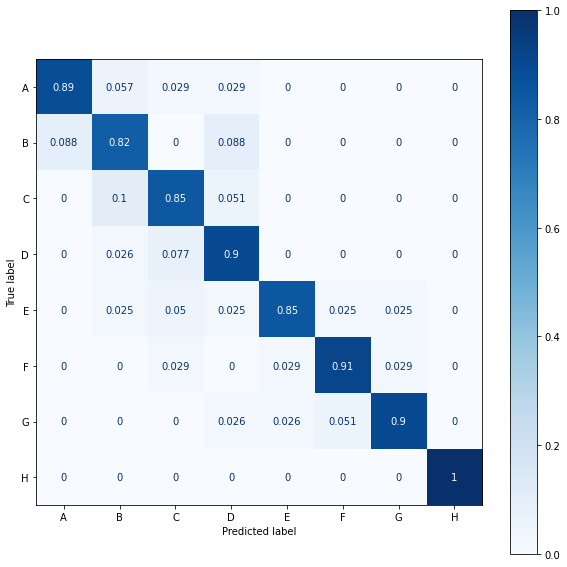

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_train, preds, labels=df['Class'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_train, y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_train,preds)
print(cf_matrix)

[[33  2  2  0  0  0  0  0]
 [ 1 34  2  0  0  0  0  0]
 [ 1  5 32  1  0  0  0  0]
 [ 1  3  4 29  0  0  0  0]
 [ 0  0  1  1 34  2  1  0]
 [ 0  0  0  1  3 37  0  0]
 [ 0  0  0  0  0  2 31  1]
 [ 0  0  0  0  0  0  0 36]]


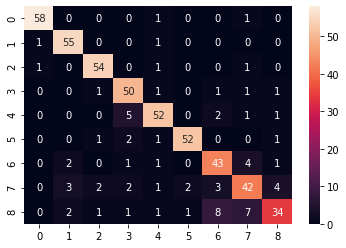

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

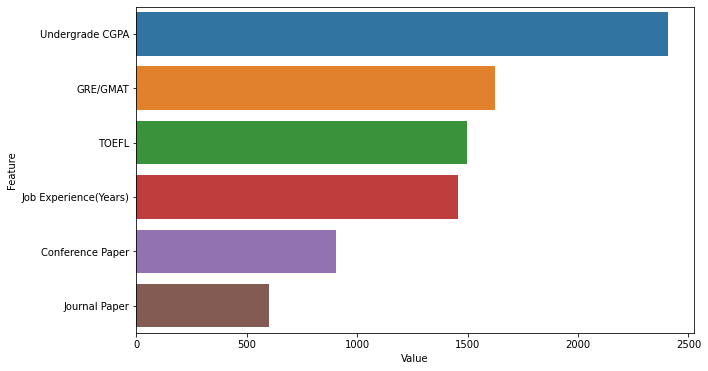

In [ ]:
feature_importance = pd.DataFrame(sorted(zip(lgbmc.feature_importances_, X_over.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))